## 4: FIRST FILTER - FOR HOW MUCH WILL THEY SHOP?


1. CHECK THE CORRELATIONS WITH ORDER PRICE AND AMOUNT
2. WHAT DO THEY MEAN?
3. USE AS FILTER TO LIMIT AMOUNT OF GROCERIES PER DAY/STORE/TIME/...

### Import libraries 

In [60]:
#Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import StrMethodFormatter
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
import dataframe_image as dfi

### Load and view data 

In [79]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")

# del df["HH"]
df.describe(include='all')

week    order_ID         item_name      amount  price_unit  \
count   372.000000  372.000000               372  372.000000  372.000000   
unique         NaN         NaN               314         NaN         NaN   
top            NaN         NaN  GROF BROOD GESN.         NaN         NaN   
freq           NaN         NaN                 6         NaN         NaN   
mean      4.043011   18.881720               NaN    1.274194    2.602328   
std       2.478648   10.908193               NaN    1.103819    1.947725   
min       1.000000    1.000000               NaN    1.000000    0.064680   
25%       1.000000    8.000000               NaN    1.000000    1.300000   
50%       4.000000   20.000000               NaN    1.000000    2.240250   
75%       6.000000   26.250000               NaN    1.000000    3.290000   
max       8.000000   39.000000               NaN   15.000000   15.610000   

        price_total    item_type            category       day     time  ...  \
count    372.000000          372                 372       372      372  ...   
unique          NaN          139                  16         7        4  ...   
top             NaN  charcuterie  fruit & vegetables  Saturday  morning  ...   
freq            NaN           25                 103        87      186  ...   
mean       2.867247          NaN                 NaN       NaN      NaN  ...   
std        2.019200          NaN                 NaN       NaN      NaN  ...   
min        0.064680          NaN                 NaN       NaN      NaN  ...   
25%        1.543970          NaN                 NaN       NaN      NaN  ...   
50%        2.462860          NaN                 NaN       NaN      NaN  ...   
75%        3.875000          NaN                 NaN       NaN      NaN  ...   
max       15.610000          NaN                 NaN       NaN      NaN  ...   

       storetype_num storename_num     cat_num    time_num  \
count     372.000000    372.000000  372.000000  372.000000   
unique           NaN           NaN         NaN         NaN   
top              NaN           NaN         NaN         NaN   
freq             NaN           NaN         NaN         NaN   
mean        3.392473      4.212366    7.462366    1.387097   
std         1.344550      2.396214    4.079557    0.896621   
min         0.000000      0.000000    0.000000    0.000000   
25%         4.000000      3.000000    6.000000    1.000000   
50%         4.000000      4.000000    9.000000    2.000000   
75%         4.000000      6.000000   11.000000    2.000000   
max         4.000000      8.000000   15.000000    3.000000   

                   datetime     timestamp       dates     times    times_min  \
count                   372  3.720000e+02         372       372   372.000000   
unique                   40           NaN          26        35          NaN   
top     2021-11-26 17:25:00           NaN  2022-01-08  17:25:00          NaN   
freq                     44           NaN          45        44          NaN   
mean                    NaN  1.639888e+18         NaN       NaN  1353.930108   
std                     NaN  1.924092e+15         NaN       NaN   371.187009   
min                     NaN  1.637435e+18         NaN       NaN   802.000000   
25%                     NaN  1.637948e+18         NaN       NaN  1055.000000   
50%                     NaN  1.639306e+18         NaN       NaN  1179.500000   
75%                     NaN  1.641640e+18         NaN       NaN  1725.000000   
max                     NaN  1.643286e+18         NaN       NaN  1858.000000   

          dates_days  
count   3.720000e+02  
unique           NaN  
top              NaN  
freq             NaN  
mean    2.021425e+07  
std     4.252837e+03  
min     2.021112e+07  
25%     2.021113e+07  
50%     2.021121e+07  
75%     2.022011e+07  
max     2.022013e+07  

[11 rows x 29 columns]

In [80]:
# use the corr function to display the correlation between all the features
data_corr = df.corr()
data_corr

week  order_ID    amount  price_unit  price_total  \
week           1.000000  0.983845 -0.006292    0.125175     0.115225   
order_ID       0.983845  1.000000  0.005611    0.134515     0.129346   
amount        -0.006292  0.005611  1.000000   -0.209230     0.165403   
price_unit     0.125175  0.134515 -0.209230    1.000000     0.899533   
price_total    0.115225  0.129346  0.165403    0.899533     1.000000   
promo          0.010478  0.030952 -0.048528    0.183813     0.179947   
reorder        0.260352  0.283895  0.010651    0.053878     0.050948   
item_id        0.868604  0.883791 -0.043050    0.136462     0.110975   
type_id        0.439799  0.462646  0.024686    0.029568     0.035410   
order_amount  -0.167393 -0.118124 -0.012262   -0.041801    -0.055200   
order_price   -0.026339  0.011544 -0.062144    0.030875     0.010706   
day_num        0.037875  0.048467  0.163514    0.071248     0.133835   
storetype_num  0.060433  0.080177 -0.112660    0.061079     0.002398   
storename_num -0.127705 -0.125979  0.171548   -0.066105     0.011269   
cat_num        0.085194  0.082275 -0.292798    0.139905     0.009179   
time_num       0.460643  0.410639  0.044981    0.083835     0.121559   
timestamp      0.985761  0.972776 -0.022860    0.115674     0.096362   
times_min     -0.402949 -0.386738 -0.049977   -0.084926    -0.126275   
dates_days     0.846191  0.799191 -0.071387    0.083845     0.046190   

                  promo   reorder   item_id   type_id  order_amount  \
week           0.010478  0.260352  0.868604  0.439799     -0.167393   
order_ID       0.030952  0.283895  0.883791  0.462646     -0.118124   
amount        -0.048528  0.010651 -0.043050  0.024686     -0.012262   
price_unit     0.183813  0.053878  0.136462  0.029568     -0.041801   
price_total    0.179947  0.050948  0.110975  0.035410     -0.055200   
promo          1.000000 -0.008377  0.037797  0.087143     -0.080867   
reorder       -0.008377  1.000000  0.168060 -0.425993     -0.168441   
item_id        0.037797  0.168060  1.000000  0.513005     -0.019072   
type_id        0.087143 -0.425993  0.513005  1.000000      0.050808   
order_amount  -0.080867 -0.168441 -0.019072  0.050808      1.000000   
order_price   -0.017922 -0.131657  0.097113  0.100285      0.920146   
day_num        0.033664 -0.000282  0.072079  0.079263     -0.116226   
storetype_num  0.136420 -0.233592  0.204650  0.204804      0.666429   
storename_num -0.234044  0.131240 -0.209381 -0.113204     -0.017109   
cat_num        0.099472 -0.025548  0.136839  0.052111      0.154839   
time_num       0.086898  0.129118  0.298844  0.151548     -0.379538   
timestamp      0.002949  0.253852  0.863728  0.442193     -0.163762   
times_min      0.040621 -0.206410 -0.297583 -0.129875      0.248016   
dates_days    -0.033650  0.186957  0.706667  0.352110     -0.213740   

               order_price   day_num  storetype_num  storename_num   cat_num  \
week             -0.026339  0.037875       0.060433      -0.127705  0.085194   
order_ID          0.011544  0.048467       0.080177      -0.125979  0.082275   
amount           -0.062144  0.163514      -0.112660       0.171548 -0.292798   
price_unit        0.030875  0.071248       0.061079      -0.066105  0.139905   
price_total       0.010706  0.133835       0.002398       0.011269  0.009179   
promo            -0.017922  0.033664       0.136420      -0.234044  0.099472   
reorder          -0.131657 -0.000282      -0.233592       0.131240 -0.025548   
item_id           0.097113  0.072079       0.204650      -0.209381  0.136839   
type_id           0.100285  0.079263       0.204804      -0.113204  0.052111   
order_amount      0.920146 -0.116226       0.666429      -0.017109  0.154839   
order_price       1.000000 -0.163981       0.685969      -0.128586  0.212201   
day_num          -0.163981  1.000000      -0.069984       0.332089 -0.108269   
storetype_num     0.685969 -0.069984       1.000000      -0.471853  0.335379   
storename_num    -0.128586  0.332089 

## Check the correlations

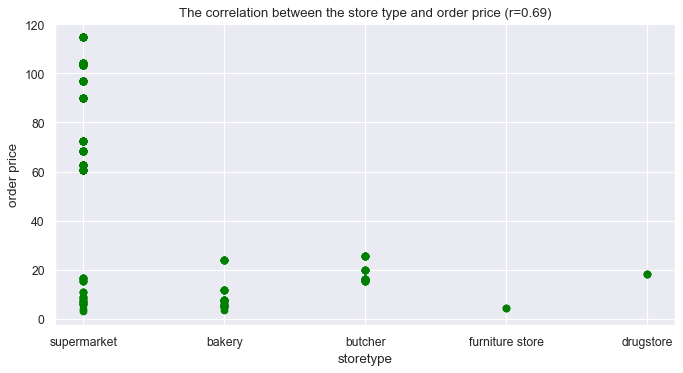

In [82]:
# What is the correlation between store type and order price?

# get the Pearson correlation between both variables
current_corr = round(data_corr["storetype_num"]["order_price"], 2)

# select the x and y features
x = df['store_type']# select the x feature
y = df['order_price']# select the y feature

# fit the points with the scatter function
figure(figsize=(10, 5), dpi=80)
plt.plot(x, y, 'o', color='green');

# give the graph a title and labels
plt.xlabel("storetype")
plt.ylabel('order price')
plt.title(f"The correlation between the store type and order price (r={current_corr})")

# call the graph (show function)
plt.grid(True)
plt.show()

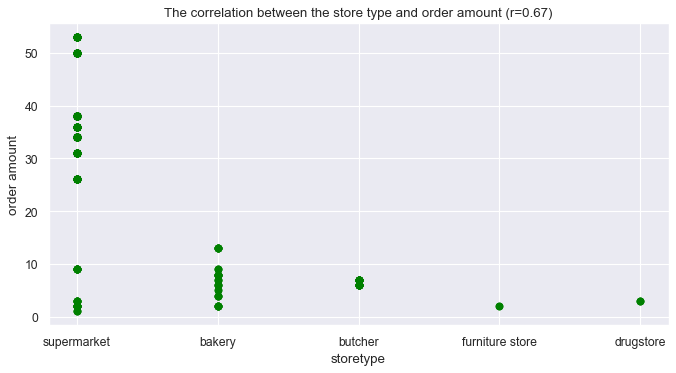

In [134]:
# What is the correlation between store type and order amount?

# get the Pearson correlation between both variables
current_corr = round(data_corr["storetype_num"]["order_amount"], 2)

# select the x and y features
x = df['store_type']# select the x feature
y = df['order_amount']# select the y feature

# fit the points with the scatter function
figure(figsize=(10, 5), dpi=80)
plt.plot(x, y, 'o', color='green');

# give the graph a title and labels
plt.xlabel("storetype")
plt.ylabel('order amount')
plt.title(f"The correlation between the store type and order amount (r={current_corr})")

# call the graph (show function)
plt.grid(True)
plt.show()

## Order price/amount vs. amount of categories

## Order price

### For Supermarkets

In [83]:
# to select only one time
df_storetype = df[df["store_type"] == 'supermarket']

# df_storetype.tail()

df_storetype1 = df_storetype.groupby(['day', 'week'])["order_price"].agg(["mean"])
df_storetype1 = pd.DataFrame (df_storetype1)
df_storetype1 = df_storetype1.reset_index()
df_storetype1

day  week        mean
0      Friday     1  103.329980
1      Friday     8    2.950000
2      Monday     7    8.080000
3      Monday     8   56.854286
4    Saturday     1   68.311420
5    Saturday     6   96.788207
6    Saturday     8   15.560000
7      Sunday     3    6.080000
8      Sunday     4  114.878340
9      Sunday     7   90.160000
10   Thursday     2   62.863083
11   Thursday     3   72.487014
12   Thursday     7    8.980000
13   Thursday     8   11.070000
14    Tuesday     1   16.770000
15    Tuesday     5  104.360960
16  Wednesday     1    6.990000
17  Wednesday     2    3.990000
18  Wednesday     4    5.490000
19  Wednesday     8    6.490000

In [84]:
print(f'Mean order price at a supermarket =  {df_storetype1["mean"].mean()}')

Mean order price at a supermarket =  43.12416448571429


In [85]:
store_name = 'Albert Heijn'
df_storename = df[df["store_name"] == store_name]

df_storename = df_storename.groupby(['day', 'week'])["order_price"].agg(["mean"])
df_storename = pd.DataFrame (df_storename)
df_storename = df_storename.reset_index()
df_storename

day  week       mean
0     Friday     8   2.950000
1     Monday     7   8.080000
2     Monday     8  56.854286
3     Sunday     3   6.080000
4   Thursday     7   8.980000
5   Thursday     8  11.070000
6  Wednesday     1   6.990000
7  Wednesday     2   3.990000
8  Wednesday     4   5.490000
9  Wednesday     8   6.490000

In [86]:
print(f'Mean order price at Albert Heijn =  {df_storename["mean"].mean()}')

Mean order price at Albert Heijn =  11.697428571428569


In [87]:
print(f'Max order price at Albert Heijn =  {df_storename["mean"].max()}')

Max order price at Albert Heijn =  56.85428571428571


In [88]:
print(f'Min order price at Albert Heijn =  {df_storename["mean"].min()}')

Min order price at Albert Heijn =  2.95


#### Order price per dow per week

In [89]:
# grouping the variables based of unique order id count
df_nunique = df_storetype.groupby(['day', 'week'])["order_price"].agg(["mean"])
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
# df_nunique

# df for week 1
df_week1 = df_nunique[df_nunique["week"] == 1]
print(df_week1)

# df for week 2
df_week2 = df_nunique[df_nunique["week"] == 2]
print(df_week2)

# df for week 3
df_week3 = df_nunique[df_nunique["week"] == 3]
print(df_week3)

# df for week 4
df_week4 = df_nunique[df_nunique["week"] == 4]
print(df_week4)

# df for week 5
df_week5 = df_nunique[df_nunique["week"] == 5]
print(df_week5)

# df for week 6
df_week6 = df_nunique[df_nunique["week"] == 6]
print(df_week6)

# df for week 7
df_week7 = df_nunique[df_nunique["week"] == 7]
print(df_week7)

# df for week 8
df_week8 = df_nunique[df_nunique["week"] == 8]
print(df_week8)

          day  week       mean
0      Friday     1  103.32998
4    Saturday     1   68.31142
14    Tuesday     1   16.77000
16  Wednesday     1    6.99000
          day  week       mean
10   Thursday     2  62.863083
17  Wednesday     2   3.990000
         day  week       mean
7     Sunday     3   6.080000
11  Thursday     3  72.487014
          day  week       mean
8      Sunday     4  114.87834
18  Wednesday     4    5.49000
        day  week       mean
15  Tuesday     5  104.36096
        day  week       mean
5  Saturday     6  96.788207
         day  week   mean
2     Monday     7   8.08
9     Sunday     7  90.16
12  Thursday     7   8.98
          day  week       mean
1      Friday     8   2.950000
3      Monday     8  56.854286
6    Saturday     8  15.560000
13   Thursday     8  11.070000
19  Wednesday     8   6.490000


<AxesSubplot:xlabel='day', ylabel='mean'>

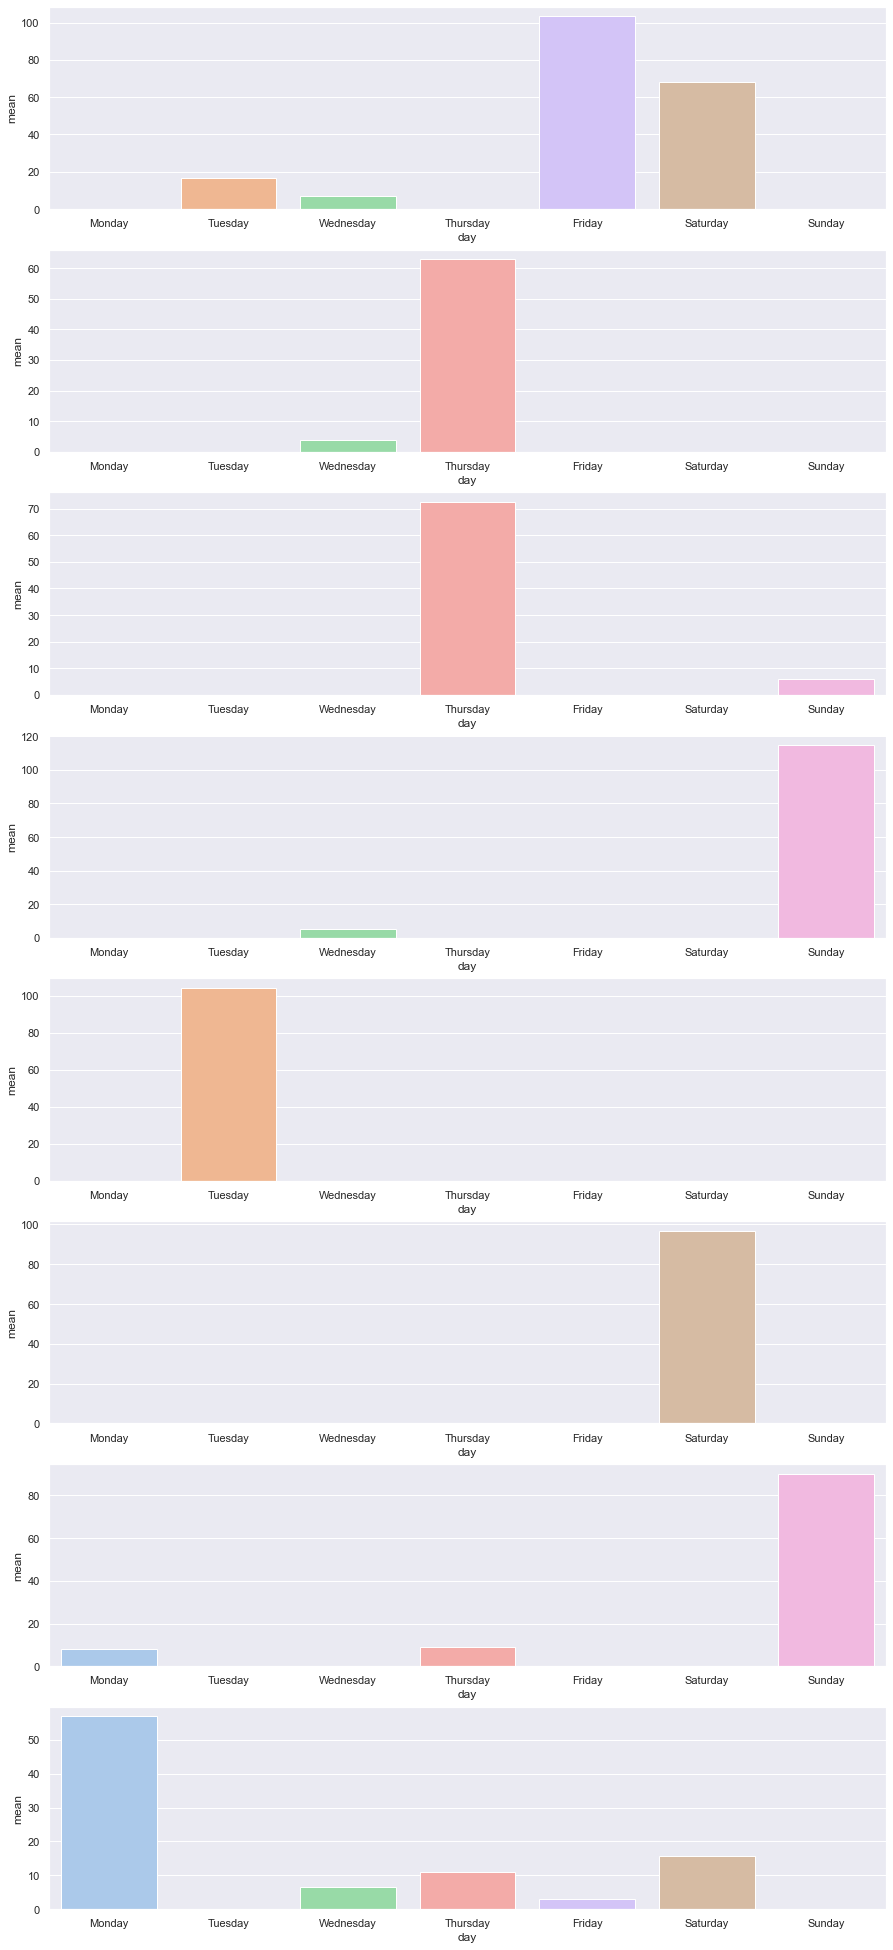

In [90]:
# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# palette= {'morning': 'blue', 'noon':'lightblue', 'afternoon': 'green', 'evening' : 'lightgreen'}

#set seaborn plotting aesthetics as default
sns.set()

# Creating subplots per week
fig, axes = plt.subplots(8, 1, figsize=(15, 35))

# week 1
sns.barplot(x=df_week1['day'], y=df_week1['mean'], palette= 'pastel', order=order, data=df_week1, ax=axes[0])

# week 2
sns.barplot(x=df_week2['day'], y=df_week2['mean'], palette= 'pastel', order=order, data=df_week2, ax=axes[1])

# week 3
sns.barplot(x=df_week3['day'], y=df_week3['mean'], palette= 'pastel', order=order, data=df_week3, ax=axes[2])

# week 4
sns.barplot(x=df_week4['day'], y=df_week4['mean'], palette= 'pastel', order=order, data=df_week4, ax=axes[3])

# week 5
sns.barplot(x=df_week5['day'], y=df_week5['mean'], palette= 'pastel', order=order, data=df_week5, ax=axes[4])

# week 6
sns.barplot(x=df_week6['day'], y=df_week6['mean'], palette= 'pastel', order=order, data=df_week6, ax=axes[5])

# week 7
sns.barplot(x=df_week7['day'], y=df_week7['mean'], palette= 'pastel', order=order, data=df_week7, ax=axes[6])

# week 8
sns.barplot(x=df_week8['day'], y=df_week8['mean'], palette= 'pastel', order=order, data=df_week8, ax=axes[7])

In [91]:
day = 'Wednesday'
df_Wed = df[df["day"] == day]

df_Wed = df_Wed.groupby(['day', 'week'])["order_price"].agg(["mean"])
df_Wed = pd.DataFrame (df_Wed)
df_Wed = df_Wed.reset_index()
df_Wed

day  week    mean
0  Wednesday     1  6.9900
1  Wednesday     2  6.7725
2  Wednesday     4  5.4900
3  Wednesday     8  6.4900

In [92]:
print(f'Mean order price on Wednesday =  {df_Wed["mean"].mean()}')

Mean order price on Wednesday =  6.435625


#### Order price per time per week

In [93]:
# grouping the variables based of unique order id count
df_nunique = df_storetype.groupby(['time', 'week'])["order_price"].agg(["mean"])
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
# df_nunique

# df for week 1
df_week1 = df_nunique[df_nunique["week"] == 1]
print(df_week1)

# df for week 2
df_week2 = df_nunique[df_nunique["week"] == 2]
print(df_week2)

# df for week 3
df_week3 = df_nunique[df_nunique["week"] == 3]
print(df_week3)

# df for week 4
df_week4 = df_nunique[df_nunique["week"] == 4]
print(df_week4)

# df for week 5
df_week5 = df_nunique[df_nunique["week"] == 5]
print(df_week5)

# df for week 6
df_week6 = df_nunique[df_nunique["week"] == 6]
print(df_week6)

# df for week 7
df_week7 = df_nunique[df_nunique["week"] == 7]
print(df_week7)

# df for week 8
df_week8 = df_nunique[df_nunique["week"] == 8]
print(df_week8)

         time  week        mean
0   afternoon     1  103.329980
3     evening     1   68.311420
13       noon     1   13.975714
        time  week       mean
1  afternoon     2  62.863083
6    morning     2   3.990000
      time  week       mean
4  evening     3  72.487014
7  morning     3   6.080000
       time  week       mean
8   morning     4  114.87834
14     noon     4    5.49000
      time  week       mean
9  morning     5  104.36096
       time  week       mean
10  morning     6  96.788207
       time  week   mean
11  morning     7  90.16
15     noon     7   8.62
         time  week    mean
2   afternoon     8  15.560
5     evening     8  60.660
12    morning     8  11.070
16       noon     8   6.138


<AxesSubplot:xlabel='time', ylabel='mean'>

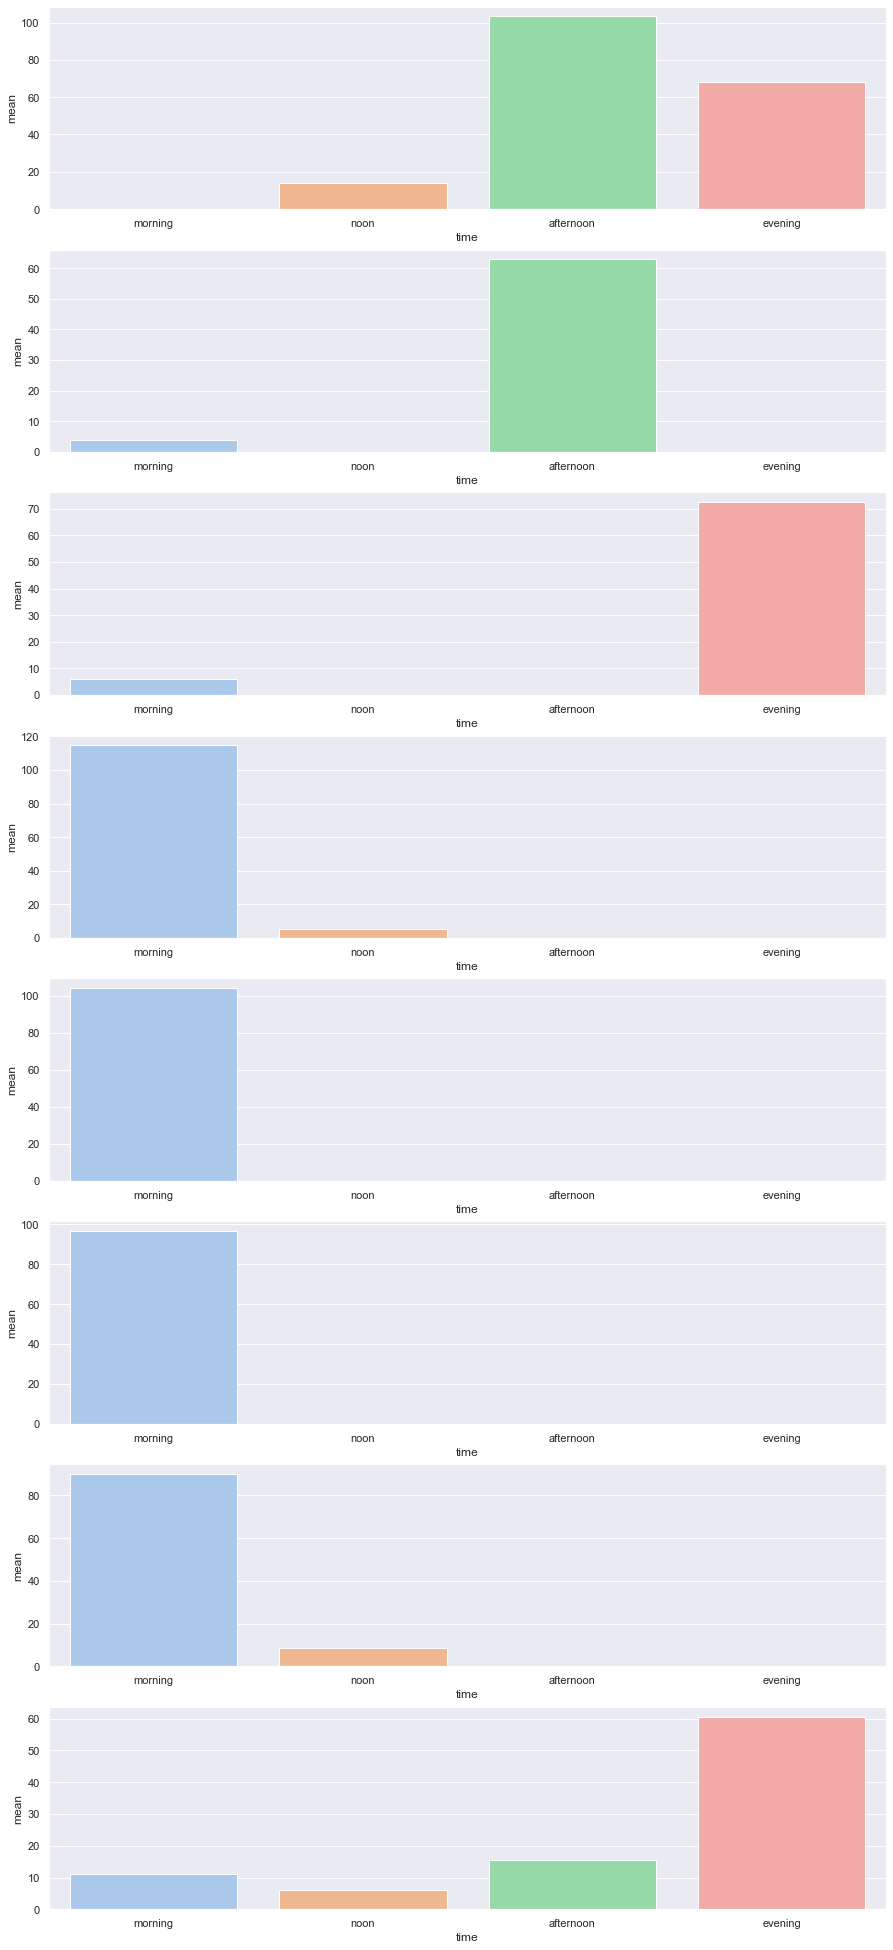

In [94]:
# setting the values 
order = ["morning", "noon", "afternoon", "evening"]

#set seaborn plotting aesthetics as default
sns.set()

# Creating subplots per week
fig, axes = plt.subplots(8, 1, figsize=(15, 35))

# week 1
sns.barplot(x=df_week1['time'], y=df_week1['mean'], palette= 'pastel', order=order, data=df_week1, ax=axes[0])

# week 2
sns.barplot(x=df_week2['time'], y=df_week2['mean'], palette= 'pastel', order=order, data=df_week2, ax=axes[1])

# week 3
sns.barplot(x=df_week3['time'], y=df_week3['mean'], palette= 'pastel', order=order, data=df_week3, ax=axes[2])

# week 4
sns.barplot(x=df_week4['time'], y=df_week4['mean'], palette= 'pastel', order=order, data=df_week4, ax=axes[3])

# week 5
sns.barplot(x=df_week5['time'], y=df_week5['mean'], palette= 'pastel', order=order, data=df_week5, ax=axes[4])

# week 6
sns.barplot(x=df_week6['time'], y=df_week6['mean'], palette= 'pastel', order=order, data=df_week6, ax=axes[5])

# week 7
sns.barplot(x=df_week7['time'], y=df_week7['mean'], palette= 'pastel', order=order, data=df_week7, ax=axes[6])

# week 8
sns.barplot(x=df_week8['time'], y=df_week8['mean'], palette= 'pastel', order=order, data=df_week8, ax=axes[7])

In [95]:
time = 'noon'
df_time = df[df["time"] == time]

df_time = df_time.groupby(['time', 'week'])["order_price"].agg(["mean"])
df_time = pd.DataFrame (df_time)
df_time = df_time.reset_index()
df_time

time  week    mean
0  noon     1  11.613
1  noon     4   5.490
2  noon     7   8.620
3  noon     8   6.138

In [96]:
print(f'Mean order price at noon =  {df_time["mean"].mean()}')

Mean order price at noon =  7.965250000000001


## Order amount

### For Supermarkets

In [120]:
# to select only one time
df_storetype = df[df["store_type"] == 'supermarket']

# df_storetype.tail()

df_storetypemean = df_storetype.groupby(['day', 'week'])["order_amount"].agg(["mean"])
df_storetypemean = pd.DataFrame (df_storetypemean)
df_storetypemean = df_storetypemean.reset_index()
# df_storetype

In [121]:
print(f'Mean order amount at a supermarket =  {df_storetypemean["mean"].mean()}')

Mean order amount at a supermarket =  18.664285714285715


In [122]:
store_name = 'Albert Heijn'
df_storename = df[df["store_name"] == store_name]

df_storenamemean = df_storename.groupby(['day', 'week'])["order_amount"].agg(["mean"])
df_storenamemean = pd.DataFrame (df_storenamemean)
df_storenamemean = df_storenamemean.reset_index()
# df_storename

In [123]:
print(f'Mean order amount at Albert Heijn =  {df_storenamemean["mean"].mean()}')

Mean order amount at Albert Heijn =  4.128571428571428


In [124]:
print(f'Max order amount at Albert Heijn =  {df_storenamemean["mean"].max()}')

Max order amount at Albert Heijn =  24.285714285714285


#### Order amount per dow per week

In [125]:
# grouping the variables based of unique order id count
df_nunique = df_storetype.groupby(['day', 'week'])["order_amount"].agg(["mean"])
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
df_nunique

# df for week 1
df_week1 = df_nunique[df_nunique["week"] == 1]
print(df_week1)

# df for week 2
df_week2 = df_nunique[df_nunique["week"] == 2]
print(df_week2)

# df for week 3
df_week3 = df_nunique[df_nunique["week"] == 3]
print(df_week3)

# df for week 4
df_week4 = df_nunique[df_nunique["week"] == 4]
print(df_week4)

# df for week 5
df_week5 = df_nunique[df_nunique["week"] == 5]
print(df_week5)

# df for week 6
df_week6 = df_nunique[df_nunique["week"] == 6]
print(df_week6)

# df for week 7
df_week7 = df_nunique[df_nunique["week"] == 7]
print(df_week7)

# df for week 8
df_week8 = df_nunique[df_nunique["week"] == 8]
print(df_week8)

          day  week  mean
0      Friday     1  50.0
4    Saturday     1  31.0
14    Tuesday     1   9.0
16  Wednesday     1   2.0
          day  week  mean
10   Thursday     2  36.0
17  Wednesday     2   1.0
         day  week  mean
7     Sunday     3   2.0
11  Thursday     3  38.0
          day  week  mean
8      Sunday     4  34.0
18  Wednesday     4   1.0
        day  week  mean
15  Tuesday     5  53.0
        day  week  mean
5  Saturday     6  38.0
         day  week  mean
2     Monday     7   2.0
9     Sunday     7  34.0
12  Thursday     7   3.0
          day  week       mean
1      Friday     8   1.000000
3      Monday     8  24.285714
6    Saturday     8   9.000000
13   Thursday     8   3.000000
19  Wednesday     8   2.000000


<AxesSubplot:xlabel='day', ylabel='mean'>

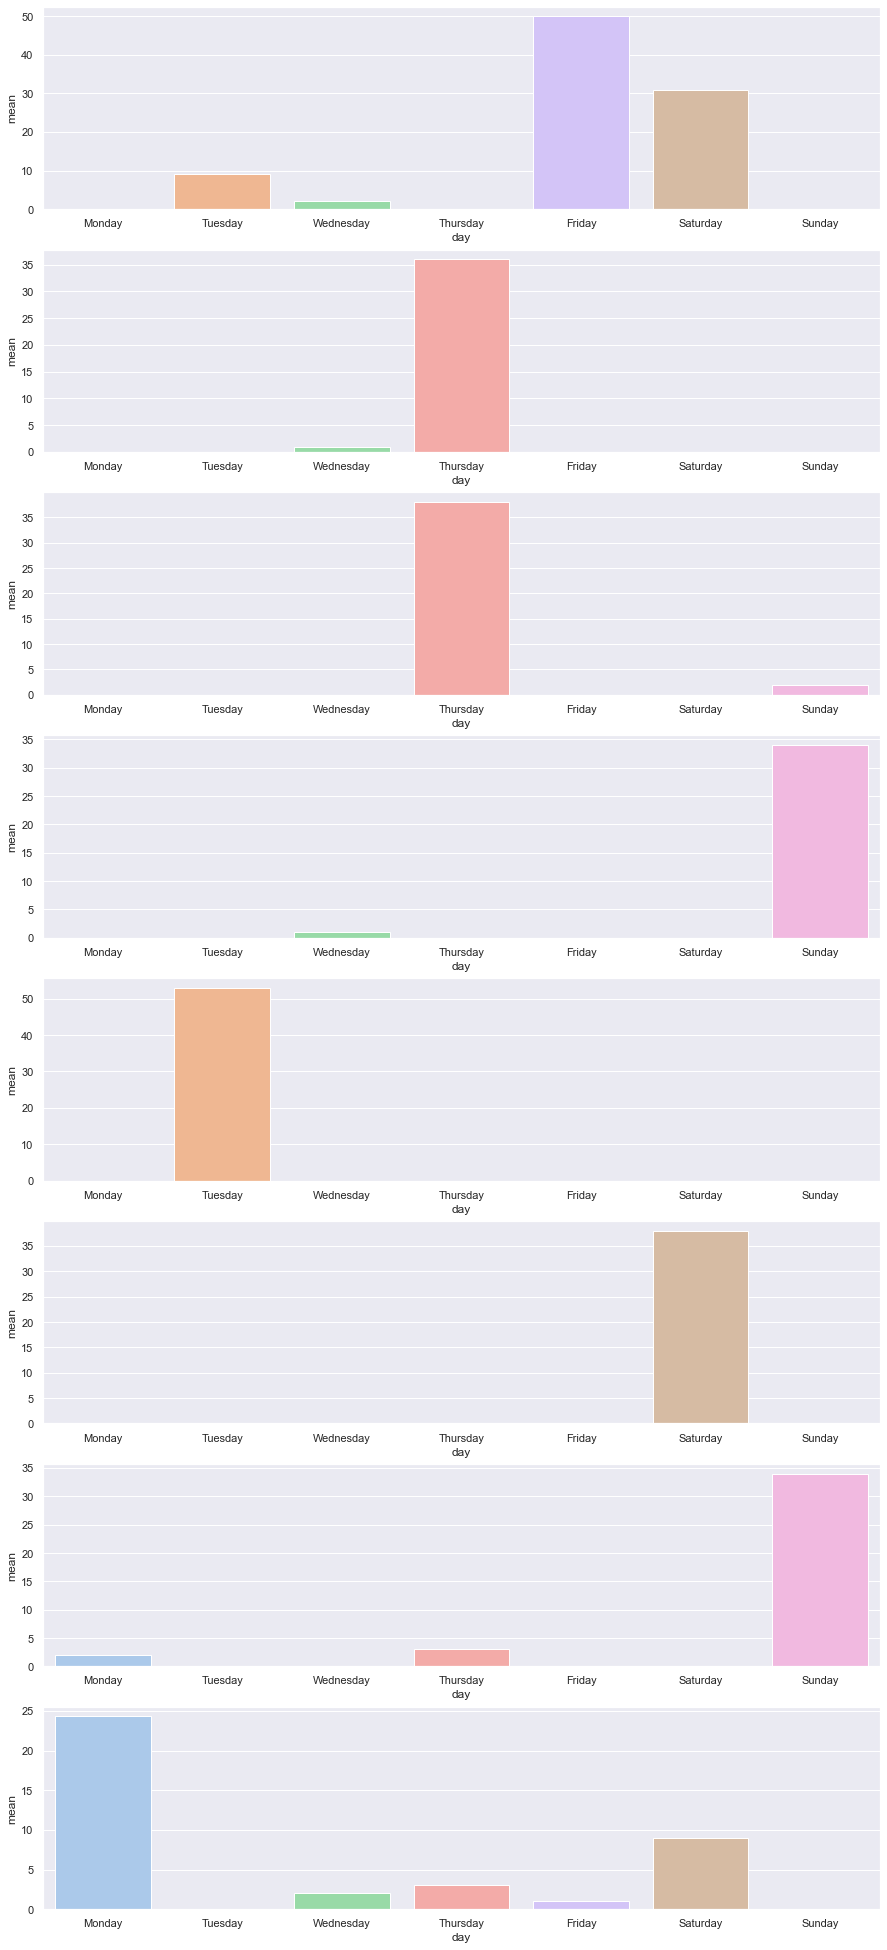

In [126]:
# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# palette= {'morning': 'blue', 'noon':'lightblue', 'afternoon': 'green', 'evening' : 'lightgreen'}

#set seaborn plotting aesthetics as default
sns.set()

# Creating subplots per week
fig, axes = plt.subplots(8, 1, figsize=(15, 35))

# week 1
sns.barplot(x=df_week1['day'], y=df_week1['mean'], palette= 'pastel', order=order, data=df_week1, ax=axes[0])

# week 2
sns.barplot(x=df_week2['day'], y=df_week2['mean'], palette= 'pastel', order=order, data=df_week2, ax=axes[1])

# week 3
sns.barplot(x=df_week3['day'], y=df_week3['mean'], palette= 'pastel', order=order, data=df_week3, ax=axes[2])

# week 4
sns.barplot(x=df_week4['day'], y=df_week4['mean'], palette= 'pastel', order=order, data=df_week4, ax=axes[3])

# week 5
sns.barplot(x=df_week5['day'], y=df_week5['mean'], palette= 'pastel', order=order, data=df_week5, ax=axes[4])

# week 6
sns.barplot(x=df_week6['day'], y=df_week6['mean'], palette= 'pastel', order=order, data=df_week6, ax=axes[5])

# week 7
sns.barplot(x=df_week7['day'], y=df_week7['mean'], palette= 'pastel', order=order, data=df_week7, ax=axes[6])

# week 8
sns.barplot(x=df_week8['day'], y=df_week8['mean'], palette= 'pastel', order=order, data=df_week8, ax=axes[7])

In [127]:
day = 'Wednesday'
df_Wed = df[df["day"] == day]

df_Wed = df_Wed.groupby(['day', 'week'])["order_amount"].agg(["mean"])
df_Wed = pd.DataFrame (df_Wed)
df_Wed = df_Wed.reset_index()
df_Wed

day  week  mean
0  Wednesday     1   2.0
1  Wednesday     2   7.0
2  Wednesday     4   1.0
3  Wednesday     8   2.0

In [128]:
print(f'Mean order amount on Wednesday =  {df_Wed["mean"].mean()}')

Mean order amount on Wednesday =  3.0


#### Order amount per time per week

In [129]:
# grouping the variables based of unique order id count
df_nunique = df_storetype.groupby(['time', 'week'])["order_amount"].agg(["mean"])
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
df_nunique

# df for week 1
df_week1 = df_nunique[df_nunique["week"] == 1]
print(df_week1)

# df for week 2
df_week2 = df_nunique[df_nunique["week"] == 2]
print(df_week2)

# df for week 3
df_week3 = df_nunique[df_nunique["week"] == 3]
print(df_week3)

# df for week 4
df_week4 = df_nunique[df_nunique["week"] == 4]
print(df_week4)

# df for week 5
df_week5 = df_nunique[df_nunique["week"] == 5]
print(df_week5)

# df for week 6
df_week6 = df_nunique[df_nunique["week"] == 6]
print(df_week6)

# df for week 7
df_week7 = df_nunique[df_nunique["week"] == 7]
print(df_week7)

# df for week 8
df_week8 = df_nunique[df_nunique["week"] == 8]
print(df_week8)

         time  week  mean
0   afternoon     1  50.0
3     evening     1  31.0
13       noon     1   7.0
        time  week  mean
1  afternoon     2  36.0
6    morning     2   1.0
      time  week  mean
4  evening     3  38.0
7  morning     3   2.0
       time  week  mean
8   morning     4  34.0
14     noon     4   1.0
      time  week  mean
9  morning     5  53.0
       time  week  mean
10  morning     6  38.0
       time  week  mean
11  morning     7  34.0
15     noon     7   2.6
         time  week  mean
2   afternoon     8   9.0
5     evening     8  26.0
12    morning     8   3.0
16       noon     8   1.8


<AxesSubplot:xlabel='time', ylabel='mean'>

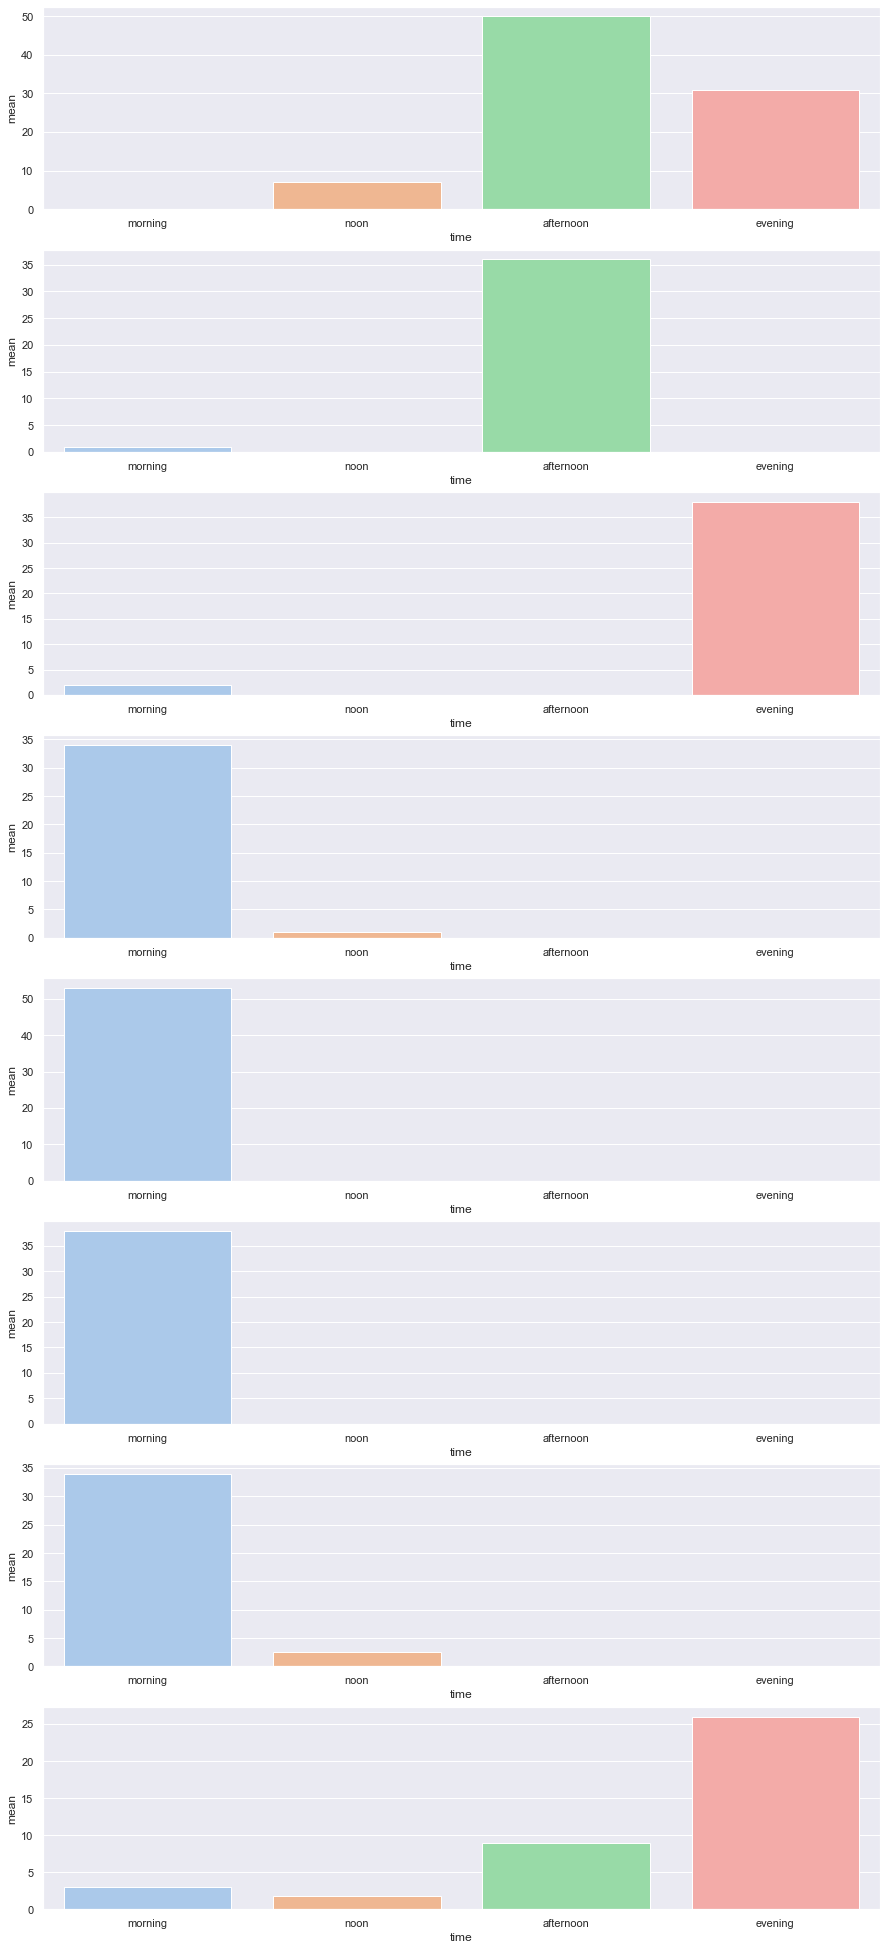

In [130]:
# setting the values 
order = ["morning", "noon", "afternoon", "evening"]

#set seaborn plotting aesthetics as default
sns.set()

# Creating subplots per week
fig, axes = plt.subplots(8, 1, figsize=(15, 35))

# week 1
sns.barplot(x=df_week1['time'], y=df_week1['mean'], palette= 'pastel', order=order, data=df_week1, ax=axes[0])

# week 2
sns.barplot(x=df_week2['time'], y=df_week2['mean'], palette= 'pastel', order=order, data=df_week2, ax=axes[1])

# week 3
sns.barplot(x=df_week3['time'], y=df_week3['mean'], palette= 'pastel', order=order, data=df_week3, ax=axes[2])

# week 4
sns.barplot(x=df_week4['time'], y=df_week4['mean'], palette= 'pastel', order=order, data=df_week4, ax=axes[3])

# week 5
sns.barplot(x=df_week5['time'], y=df_week5['mean'], palette= 'pastel', order=order, data=df_week5, ax=axes[4])

# week 6
sns.barplot(x=df_week6['time'], y=df_week6['mean'], palette= 'pastel', order=order, data=df_week6, ax=axes[5])

# week 7
sns.barplot(x=df_week7['time'], y=df_week7['mean'], palette= 'pastel', order=order, data=df_week7, ax=axes[6])

# week 8
sns.barplot(x=df_week8['time'], y=df_week8['mean'], palette= 'pastel', order=order, data=df_week8, ax=axes[7])

In [131]:
time = 'noon'
df_time = df[df["time"] == time]

df_time = df_time.groupby(['time', 'week'])["order_amount"].agg(["mean"])
df_time = pd.DataFrame (df_time)
df_time = df_time.reset_index()
df_time

time  week  mean
0  noon     1   7.0
1  noon     4   1.0
2  noon     7   2.6
3  noon     8   1.8

In [132]:
print(f'Mean order amount at noon =  {df_time["mean"].mean()}')

Mean order amount at noon =  3.1
